In [11]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

from sentence_transformers import SentenceTransformer
from umap.umap_ import UMAP
from bertopic import BERTopic  # ✅ THIS LINE

In [6]:
import os

# Change this to ANY folder on your Mac that has space:
os.environ['HF_HOME'] = '/Users/priyalsharma/Documents/hf_cache'
os.environ['HF_DATASETS_CACHE'] = '/Users/priyalsharma/Documents/hf_cache/datasets'
os.environ['TRANSFORMERS_CACHE'] = '/Users/priyalsharma/Documents/hf_cache/transformers'

In [7]:
# Adjust to the name you uploaded — usually the same filename
data = pd.read_csv("/Users/priyalsharma/Downloads/mental-heath-in-tech-2016_20161114.csv")

In [8]:
data = data.rename(columns={
    "Are you self-employed?": "self_employed",
    "How many employees does your company or organization have?": "num_employees",
    "Is your employer primarily a tech company/organization?": "employer_tech",
    "Is your primary role within your company related to tech/IT?": "role_tech",
    "Does your employer provide mental health benefits as part of healthcare coverage?": "mh_benefits",
    "Do you know the options for mental health care available under your employer-provided coverage?": "mh_options_known",
    "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?": "mh_formal_discussion",
    "Does your employer offer resources to learn more about mental health concerns and options for seeking help?": "mh_resources_available",
    "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?": "anonymity_protected",
    "If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:": "mh_leave_request_difficulty",
    "Do you think that discussing a mental health disorder with your employer would have negative consequences?": "mh_discussion_neg_conseq_employer",
    "Do you think that discussing a physical health issue with your employer would have negative consequences?": "phys_health_neg_conseq_employer",
    "Would you feel comfortable discussing a mental health disorder with your coworkers?": "mh_comfort_coworkers",
    "Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?": "mh_comfort_supervisor",
    "Do you feel that your employer takes mental health as seriously as physical health?": "mh_vs_phys_health_importance",
    "Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?": "mh_neg_conseq_observed",
    "Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?": "mh_coverage",
    "Do you know local or online resources to seek help for a mental health disorder?": "mh_local_online_resources",
    "If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?": "mh_reveal_clients",
    "If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?": "mh_neg_impact_clients",
    "If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?": "mh_reveal_coworkers",
    "If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?": "mh_neg_impact_coworkers",
    "Do you believe your productivity is ever affected by a mental health issue?": "mh_productivity_effect",
    "If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?": "mh_work_time_affected_pct",
    "Do you have previous employers?": "previous_employers",
    "Have your previous employers provided mental health benefits?": "prev_mh_benefits",
    "Were you aware of the options for mental health care provided by your previous employers?": "prev_mh_options_known",
    "Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?": "prev_mh_formal_discussion",
    "Did your previous employers provide resources to learn more about mental health issues and how to seek help?": "prev_mh_resources_available",
    "Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?": "prev_anonymity_protected",
    "Do you think that discussing a mental health disorder with previous employers would have negative consequences?": "prev_mh_neg_conseq",
    "Do you think that discussing a physical health issue with previous employers would have negative consequences?": "prev_phys_neg_conseq",
    "Would you have been willing to discuss a mental health issue with your previous co-workers?": "prev_mh_comfort_coworkers",
    "Would you have been willing to discuss a mental health issue with your direct supervisor(s)?": "prev_mh_comfort_supervisor",
    "Did you feel that your previous employers took mental health as seriously as physical health?": "prev_mh_vs_phys_health_importance",
    "Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?": "prev_mh_neg_conseq_observed",
    "Would you be willing to bring up a physical health issue with a potential employer in an interview?": "interview_phys_health",
    "Why or why not?": "interview_phys_health_reason",
    "Would you bring up a mental health issue with a potential employer in an interview?": "interview_mh",
    "Why or why not?.1": "interview_mh_reason",
    "Do you feel that being identified as a person with a mental health issue would hurt your career?": "mh_identification_career_impact",
    "Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?": "mh_neg_view_coworkers",
    "How willing would you be to share with friends and family that you have a mental illness?": "mh_share_family_friends",
    "Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?": "mh_bad_response_observed",
    "Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?": "mh_obs_reduce_disclosure",
    "Do you have a family history of mental illness?": "family_history_mh",
    "Have you had a mental health disorder in the past?": "mh_history",
    "Do you currently have a mental health disorder?": "mh_current",
    "If yes, what condition(s) have you been diagnosed with?": "mh_diagnosed_conditions",
    "If maybe, what condition(s) do you believe you have?": "mh_possible_conditions",
    "Have you been diagnosed with a mental health condition by a medical professional?": "mh_diagnosed_pro",
    "If so, what condition(s) were you diagnosed with?": "mh_diagnosed_conditions_pro",
    "Have you ever sought treatment for a mental health issue from a mental health professional?": "mh_treatment_sought",
    "If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?": "mh_effective_treatment_work_effect",
    "If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?": "mh_ineffective_treatment_work_effect",
    "What is your age?": "age",
    "What is your gender?": "gender",
    "What country do you live in?": "country_live",
    "What US state or territory do you live in?": "us_state_live",
    "What country do you work in?": "country_work",
    "What US state or territory do you work in?": "us_state_work",
    "Which of the following best describes your work position?": "work_position",
    "Do you work remotely?": "work_remote"
})



In [9]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re

# Preprocessing function
def preprocess(docs):
    cleaned_docs = []
    for doc in docs:
        # Lowercase
        text = doc.lower()
        # Remove punctuation and non-letters
        text = re.sub(r'[^a-z\s]', '', text)
        # Remove stopwords
        words = [word for word in text.split() if word not in ENGLISH_STOP_WORDS]
        # Rejoin
        cleaned_text = ' '.join(words)
        cleaned_docs.append(cleaned_text)
    return cleaned_docs

# Combine text columns
text_cols = [
    'interview_phys_health_reason',
    'interview_mh_reason',
]

data['document'] = data[text_cols].fillna('').apply(lambda row: ' '.join(row), axis=1)

# Apply cleaning
docs_clean = preprocess(data['document'].tolist())

# Remove empty docs
docs_clean = [doc for doc in docs_clean if doc.strip() != '']

# Final docs for BERTopic
docs = docs_clean

# Make cleaned DataFrame
data_clean = data.copy()
data_clean['cleaned_text'] = preprocess(data['document'].tolist())

# Filter out empty docs
data_clean = data_clean[data_clean['cleaned_text'].str.strip() != '']

# Now your "docs" and "data_clean" are perfectly aligned
docs = data_clean['cleaned_text'].tolist()


Batches: 100%|██████████████████████████████████| 37/37 [00:02<00:00, 14.01it/s]


   Topic  Count                                               Name  \
0     -1    319                      -1_job_mental_bring_interview   
1      0    378             0_health_mental_physical_mental health   
2      1    139                           1_work_affect_impact_job   
3      2    126                         2_chances_getting_job_risk   
4      3     84                          3_relevant_job_hire_hired   
5      4     35           4_interview_process_interview process_im   
6      5     20              5_privacy_private_personal_im private   
7      6     19      6_accommodation_accommodations_require_needed   
8      7     19  7_discrimination_fear discrimination_fear_disc...   
9      8     14            8_business_business business_non_hisher   

                                      Representation  \
0  [job, mental, bring, interview, wouldnt, healt...   
1  [health, mental, physical, mental health, issu...   
2  [work, affect, impact, job, ability, depends, ...   
3  [c

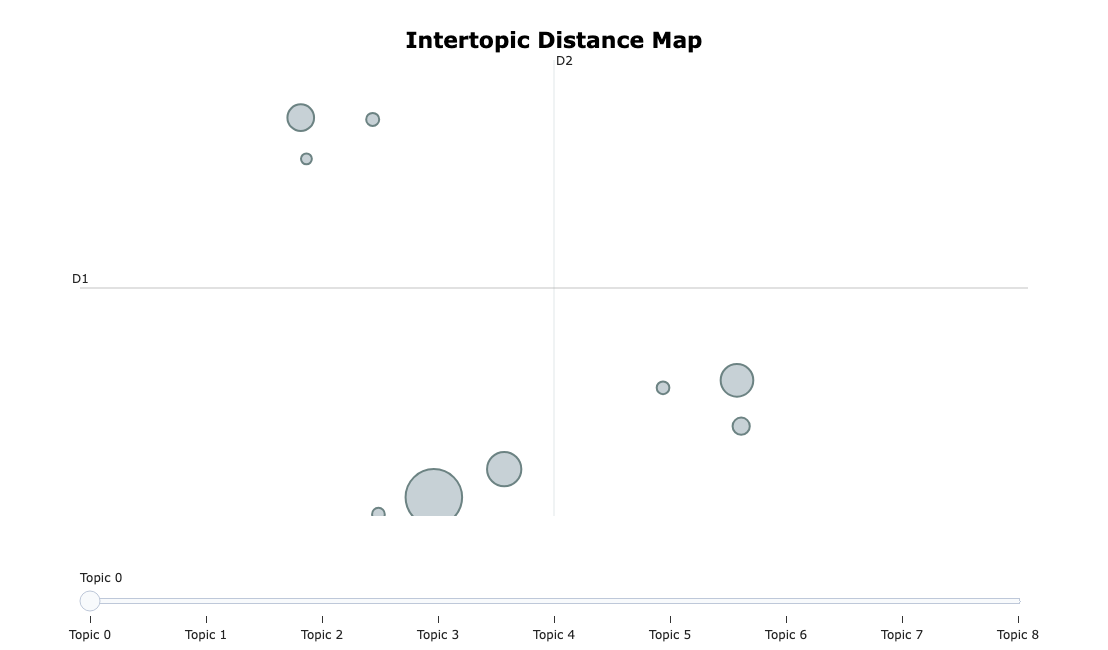

In [17]:
from umap.umap_ import UMAP


# STEP 1 — Clean DataFrame
data_clean = data.copy()
data_clean['cleaned_text'] = preprocess(data_clean['document'].tolist())
data_clean = data_clean[data_clean['cleaned_text'].str.strip() != '']
docs = data_clean['cleaned_text'].tolist()

# STEP 2 — Sentence embeddings
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = sentence_model.encode(docs, show_progress_bar=True)

# STEP 3 — Vectorizer
vectorizer_model = CountVectorizer(
    stop_words=None,
    ngram_range=(1, 2),
    min_df=1   # Safe choice
)


# STEP 4 — UMAP
umap_model = UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine')

# STEP 5 — BERTopic
topic_model = BERTopic(
    umap_model=umap_model,
    vectorizer_model=vectorizer_model,
    nr_topics=10
)
topics, probs = topic_model.fit_transform(docs, embeddings=embeddings)

# STEP 6 — Save topic labels (MATCHING lengths now!)
data_clean['bertopic_cluster'] = topics

# STEP 7 — Topic info
topic_info = topic_model.get_topic_info()
print(topic_info)

# STEP 8 — Visualize
topic_model.visualize_topics()


In [18]:
# Print top 10 words for each topic
for topic_id in topic_model.get_topic_info()['Topic']:
    if topic_id == -1:
        continue  # skip outlier topic
    words = topic_model.get_topic(topic_id)
    top_words = [word for word, _ in words]
    print(f"Topic {topic_id}: {', '.join(top_words)}")

Topic 0: health, mental, physical, mental health, issues, issue, health issue, physical health, health issues, stigma
Topic 1: work, affect, impact, job, ability, depends, performance, employer, issue, ability job
Topic 2: chances, getting, job, risk, bias, fear, getting job, chances getting, negative, affect
Topic 3: relevant, job, hire, hired, relevant relevant, dont, know, need, depends, wouldnt
Topic 4: interview, process, interview process, im, feel, bring, interviewer, depends, relevant, interviewers
Topic 5: privacy, private, personal, im private, know, im, matter, prefer hidden, thing filter, filter
Topic 6: accommodation, accommodations, require, needed, need, bring, hours, special, relevant, require accommodations
Topic 7: discrimination, fear discrimination, fear, discrimination fear, discriminated, potential discrimination, discrimination discrimination, policy, racial minority, discriminated fear
Topic 8: business, business business, non, hisher, business non, hisher busin

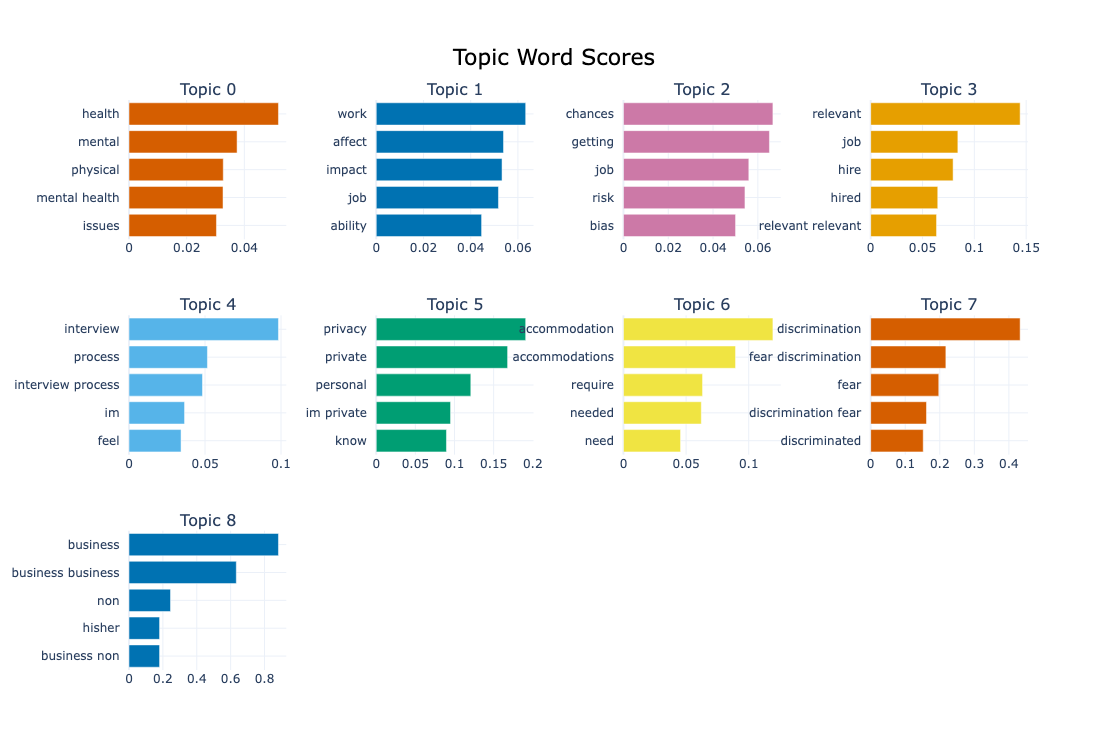

In [19]:
topic_model.visualize_barchart(top_n_topics=10)

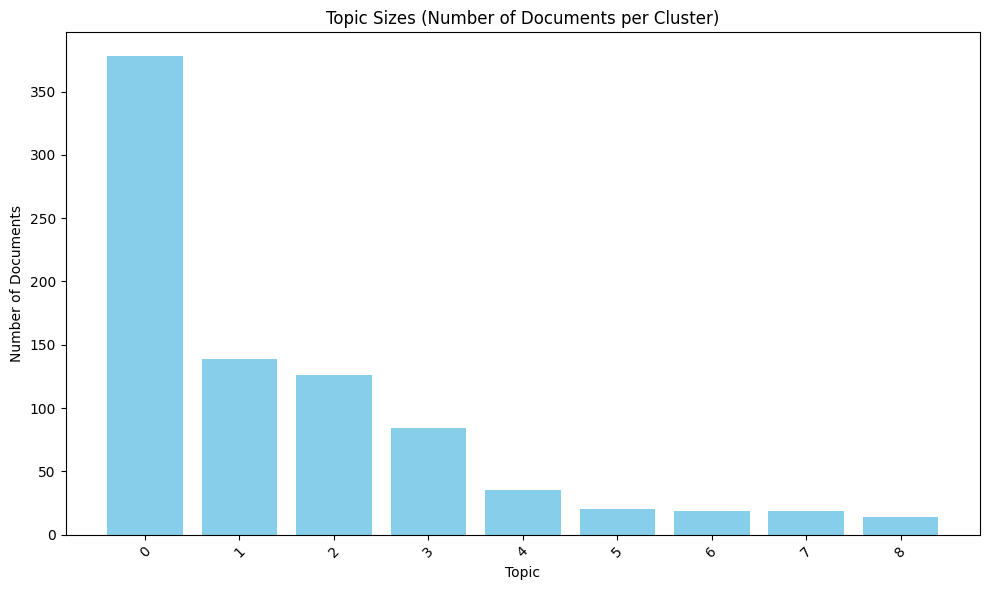

In [20]:
import matplotlib.pyplot as plt

# STEP — Get topic sizes (document count per topic)
topic_info = topic_model.get_topic_info()
topics = topic_info[topic_info.Topic != -1]  # Exclude outliers/noise if any

# Plot
plt.figure(figsize=(10, 6))
plt.bar(topics['Topic'].astype(str), topics['Count'], color='skyblue')
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.title('Topic Sizes (Number of Documents per Cluster)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
from scipy.cluster import hierarchy as sch
linkage_function = lambda x: sch.linkage(x, 'single', optimal_ordering=True)

In [23]:
hierarchical_topics = topic_model.hierarchical_topics(docs, linkage_function=linkage_function)

100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 157.04it/s]


In [24]:
topic_model.get_topic_info().Name.values

array(['-1_job_mental_bring_interview',
       '0_health_mental_physical_mental health',
       '1_work_affect_impact_job', '2_chances_getting_job_risk',
       '3_relevant_job_hire_hired',
       '4_interview_process_interview process_im',
       '5_privacy_private_personal_im private',
       '6_accommodation_accommodations_require_needed',
       '7_discrimination_fear discrimination_fear_discrimination fear',
       '8_business_business business_non_hisher'], dtype=object)

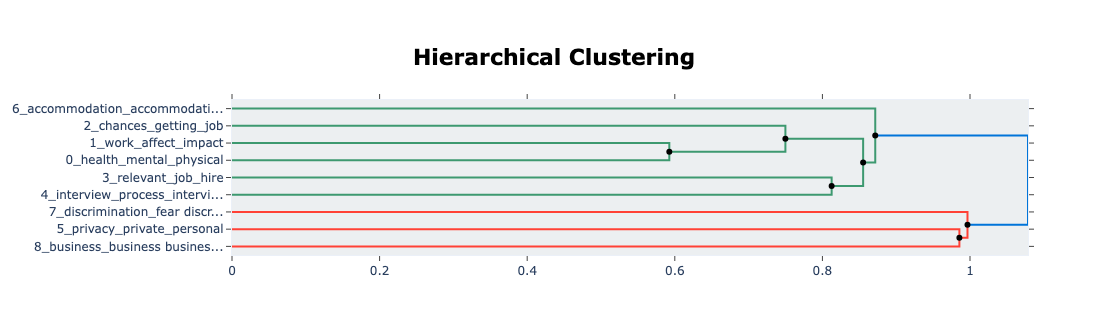

In [25]:
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

In [26]:
from sklearn.datasets import fetch_20newsgroups
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from umap import UMAP

# Load a SentenceTransformer model for embeddings
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

# Assuming `docs` is already defined — this should be a list of documents (strings)
embeddings = sentence_model.encode(docs, show_progress_bar=False)

# Train BERTopic on these embeddings
topic_model = BERTopic().fit(docs, embeddings)


fig = topic_model.visualize_documents(docs, embeddings=embeddings)
fig.show()



In [27]:
import plotly.io as pio
pio.renderers.default = 'notebook'  # OR 'notebook_connected', 'iframe', 'iframe_connected'


In [28]:

# Reduce dimensionality of embeddings, this step is optional but much faster to perform iteratively:
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
topic_model.visualize_documents(docs, reduced_embeddings=reduced_embeddings)

In [29]:
# For each topic, print 5 example docs
for topic_id in topic_info['Topic']:
    if topic_id == -1:
        continue  # Skip noise topic (-1)
    
    print(f"\n===== Topic {topic_id} =====\n")
    
    # Get docs assigned to this topic
    topic_docs = data_clean[data_clean['bertopic_cluster'] == topic_id]['cleaned_text']
    
    # Sample up to 5 docs
    sample_docs = topic_docs.sample(min(5, len(topic_docs)), random_state=42)
    
    for i, doc in enumerate(sample_docs):
        print(f"Doc {i+1}: {doc}\n")



===== Topic 0 =====

Doc 1: placecertainly wouldnt want interviewer ask physicalunless directly related job

Doc 2: ive previously punished taking care physical health bike accident want situation bring issues interviewing people disbelieve adult adhd thing suspected potential employer problems try suss taking job

Doc 3: avoid possible best possible light expect hired honest mental health issues

Doc 4: physical health socially considered legitimate fear stigma considered incompetent

Doc 5: wouldnt feel comfortable discussing personal health want appear weak want appear weak unstable


===== Topic 1 =====

Doc 1: consider private protected information given absolutely needed want able control employer able use information help job used negatively

Doc 2: depend relevant job effect negatively depend issue relevant work performed negatively effect

Doc 3: affect performance

Doc 4: case affected jobreliability case affected jobreliability

Doc 5: depends relevant affects physical func

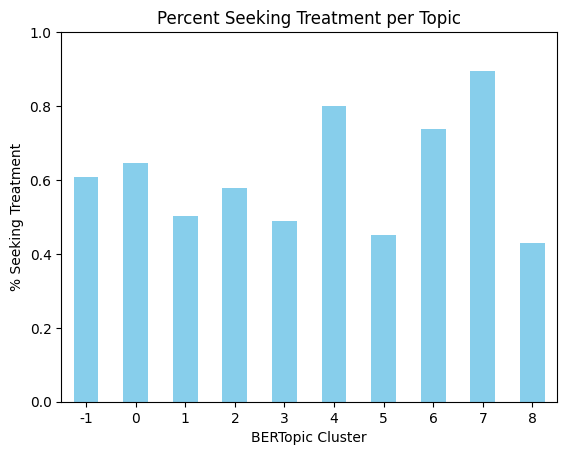

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
# Create % treatment sought per topic
treatment_per_topic = data_clean.groupby('bertopic_cluster')['mh_treatment_sought'].value_counts(normalize=True).unstack()
# Plot
treatment_per_topic[1].plot(kind='bar', color='skyblue')
plt.ylabel('% Seeking Treatment')
plt.title('Percent Seeking Treatment per Topic')
plt.xlabel('BERTopic Cluster')
plt.xticks(rotation=0)
plt.ylim(0,1)
plt.show()

In [31]:
stigma_vars = [
    'mh_discussion_neg_conseq_employer',
    'anonymity_protected',
    'mh_formal_discussion',
    'mh_resources_available'
]

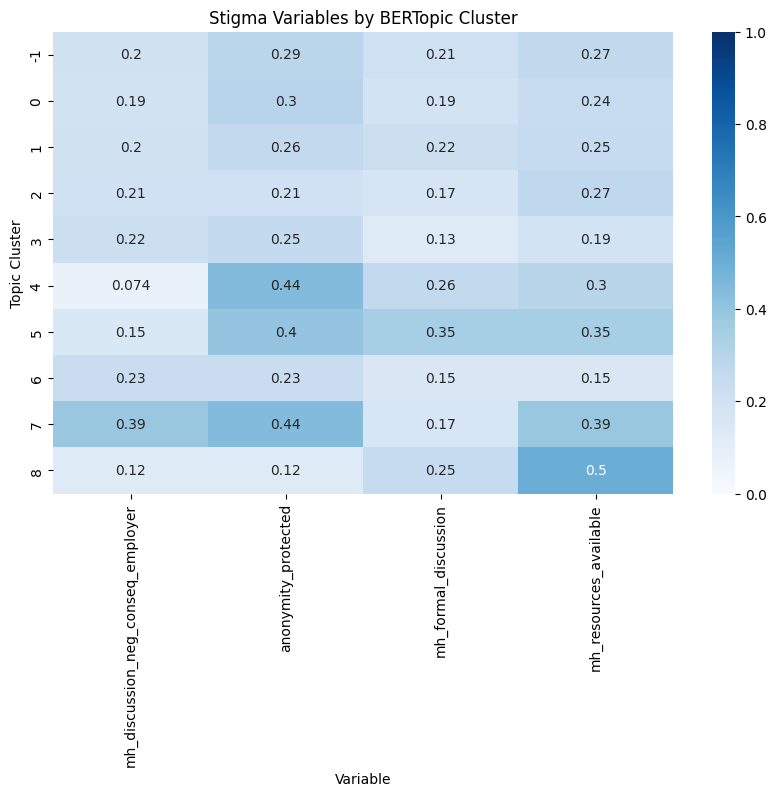

In [32]:
import seaborn as sns

# Compute % "Yes" per topic for each stigma variable
heatmap_data = pd.DataFrame()

for var in stigma_vars:
    temp = data_clean.groupby('bertopic_cluster')[var].value_counts(normalize=True).unstack()
    if 'Yes' in temp.columns:
        heatmap_data[var] = temp['Yes']
    else:
        heatmap_data[var] = 0  # if no "Yes", fill with 0

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', vmin=0, vmax=1)
plt.title('Stigma Variables by BERTopic Cluster')
plt.xlabel('Variable')
plt.ylabel('Topic Cluster')
plt.show()


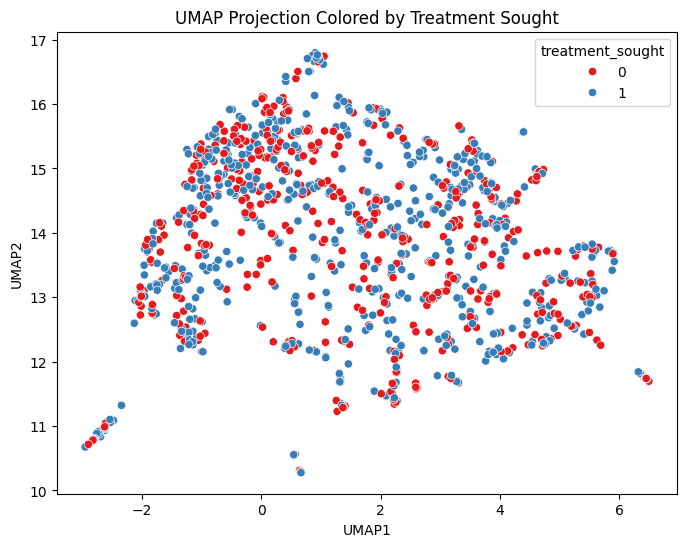

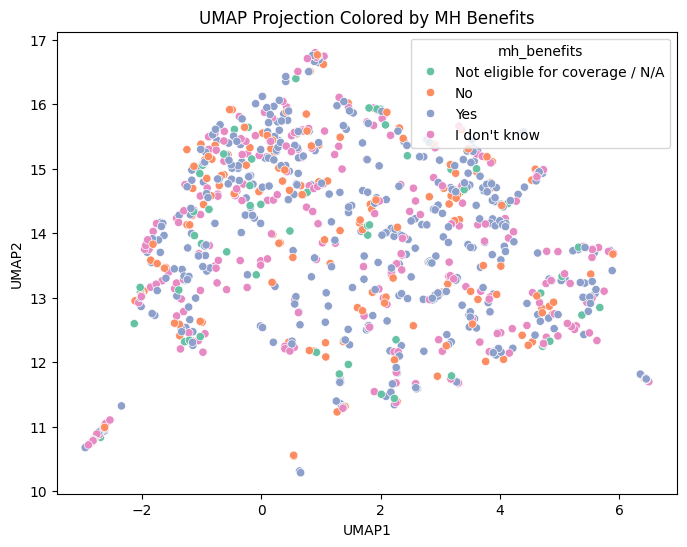

In [33]:
# Example if you already have reduced_embeddings from UMAP (n_samples x 2 array)
umap_df = pd.DataFrame(reduced_embeddings, columns=['UMAP1', 'UMAP2'])
umap_df['treatment_sought'] = data['mh_treatment_sought']
umap_df['mh_benefits'] = data['mh_benefits']

# Scatter: color by treatment sought
plt.figure(figsize=(8,6))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='treatment_sought', data=umap_df, palette='Set1')
plt.title('UMAP Projection Colored by Treatment Sought')
plt.show()

# Scatter: color by MH benefits
plt.figure(figsize=(8,6))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='mh_benefits', data=umap_df, palette='Set2')
plt.title('UMAP Projection Colored by MH Benefits')
plt.show()


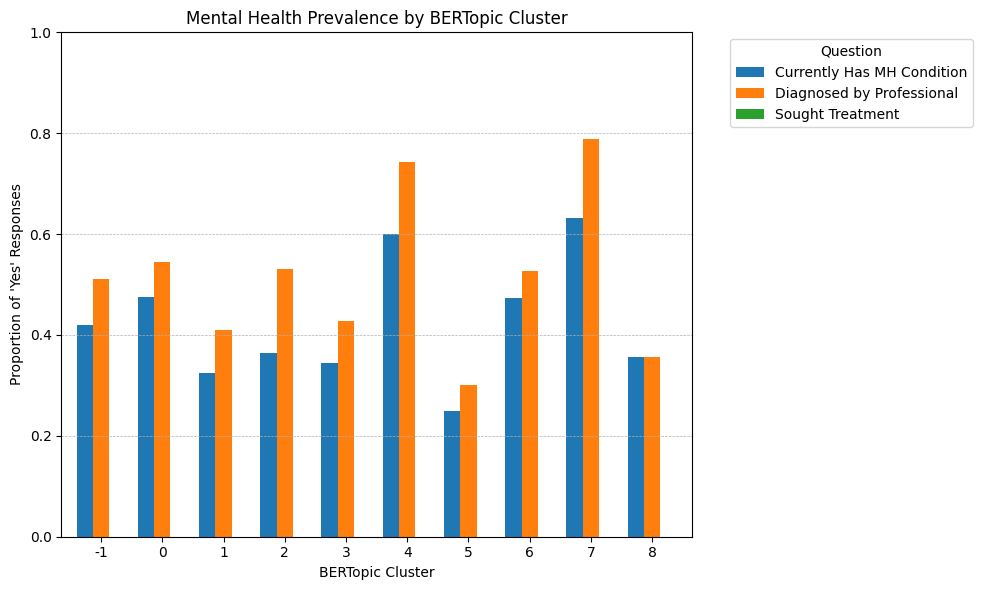

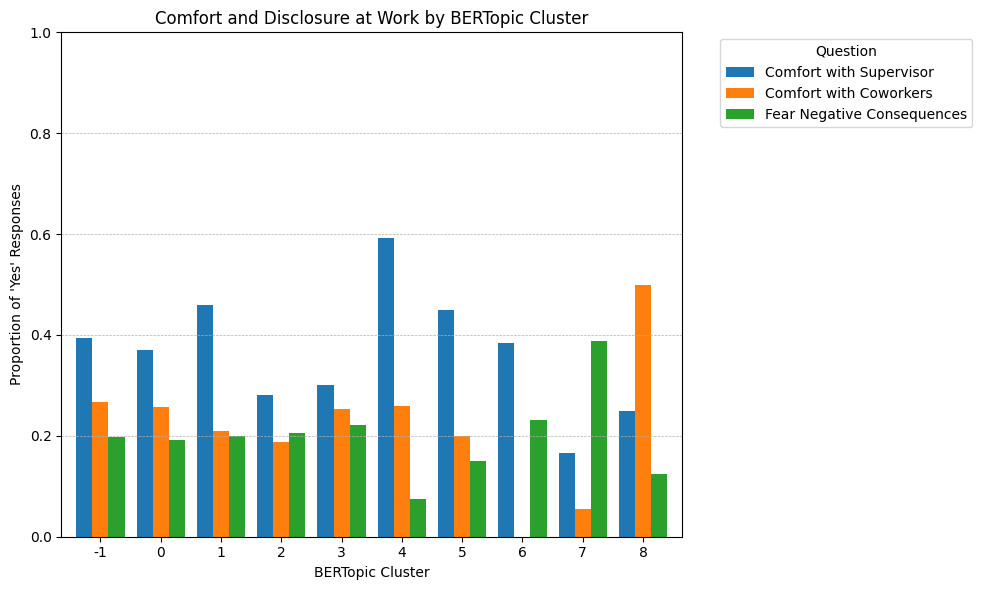

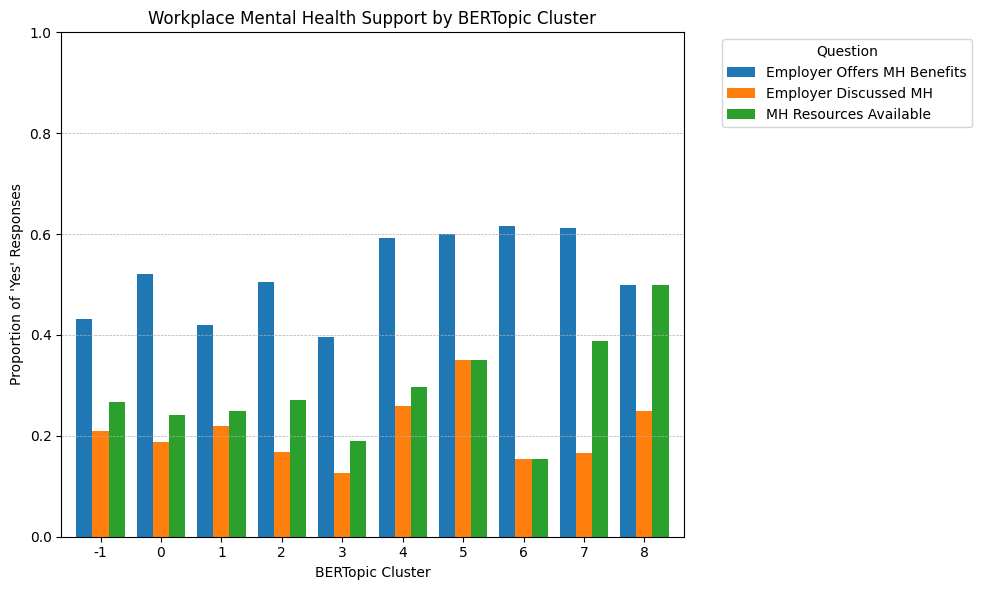

In [41]:
import pandas as pd
import matplotlib.pyplot as plt


pretty_labels = {
    "mh_current": "Currently Has MH Condition",
    "mh_diagnosed_pro": "Diagnosed by Professional",
    "mh_treatment_sought": "Sought Treatment",
    "mh_comfort_supervisor": "Comfort with Supervisor",
    "mh_comfort_coworkers": "Comfort with Coworkers",
    "mh_discussion_neg_conseq_employer": "Fear Negative Consequences",
    "mh_benefits": "Employer Offers MH Benefits",
    "mh_formal_discussion": "Employer Discussed MH",
    "mh_resources_available": "MH Resources Available"
}

for title, cols in themes.items():
    # Compute proportion of "Yes" for each column per cluster
    yes_proportions = (
        data_clean.groupby("bertopic_cluster")[cols]
        .apply(lambda g: (g == "Yes").sum() / g.notna().sum())
    )

    # Rename columns for the legend
    yes_proportions = yes_proportions.rename(columns=pretty_labels)

    # Plot
    ax = yes_proportions.plot(kind="bar", figsize=(10, 6), width=0.8)
    plt.title(f"{title} by BERTopic Cluster")
    plt.ylabel("Proportion of 'Yes' Responses")
    plt.xlabel("BERTopic Cluster")
    plt.ylim(0, 1)
    plt.xticks(rotation=0)
    plt.legend(title="Question", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.grid(axis="y", linestyle="--", linewidth=0.5)
    plt.show()


In [37]:
data_clean.head()

self_employed   num_employees  employer_tech  role_tech mh_benefits  \
1              0            6-25            1.0        NaN          No   
2              0            6-25            1.0        NaN          No   
3              1             NaN            NaN        NaN         NaN   
4              0            6-25            0.0        1.0         Yes   
5              0  More than 1000            1.0        NaN         Yes   

  mh_options_known mh_formal_discussion mh_resources_available  \
1              Yes                  Yes                    Yes   
2              NaN                   No                     No   
3              NaN                  NaN                    NaN   
4              Yes                   No                     No   
5    I am not sure                   No                    Yes   

  anonymity_protected mh_leave_request_difficulty  ...  gender  \
1                 Yes               Somewhat easy  ...    male   
2        I don't know  Neither easy nor difficult  ...   Male    
3                 NaN                         NaN  ...    male   
4                  No  Neither easy nor difficult  ...  Female   
5                 Yes               Somewhat easy  ...    Male   

               country_live us_state_live              country_work  \
1  United States of America      Illinois  United States of America   
2            United Kingdom           NaN            United Kingdom   
3            United Kingdom           NaN            United Kingdom   
4  United States of America      Illinois  United States of America   
5            United Kingdom           NaN            United Kingdom   

  us_state_work                                      work_position  \
1      Illinois             Back-end Developer|Front-end Developer   
2           NaN                                 Back-end Developer   
3           NaN                               Supervisor/Team Lead   
4      Illinois  Executive Leadership|Supervisor/Team Lead|Dev ...   
5           NaN  DevOps/SysAdmin|Support|Back-end Developer|Fro...   

   work_remote                                           document  \
1        Never  It would depend on the health issue. If there ...   
2       Always  They would provable need to know, to Judge if ...   
3    Sometimes  old back injury, doesn't cause me many issues ...   
4    Sometimes  Depending on the interview stage and whether I...   
5    Sometimes  If it would potentially affect my ability to d...   

                                        cleaned_text bertopic_cluster  
1  depend health issue health issue immediately a...               -1  
2         provable need know judge job stigma mainly                0  
3  old injury doesnt cause issues occasionally im...               -1  
4  depending interview stage required accommodati...                6  
5  potentially affect ability job require special...                1  

[5 rows x 66 columns]